┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


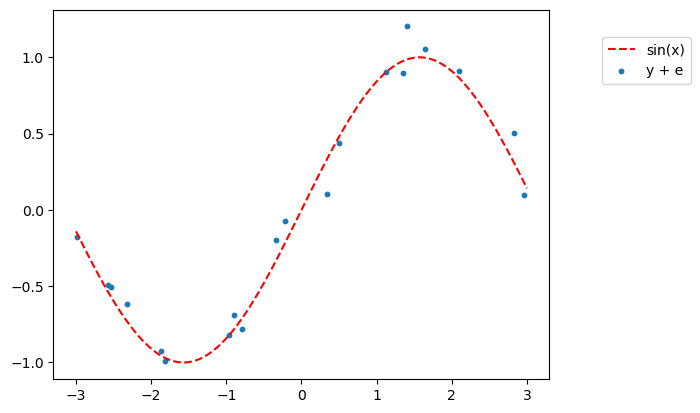

PyObject <matplotlib.legend.Legend object at 0x7fa4caa6caf0>

In [2]:
using PyPlot
using Revise
using Distributions

n = 20       # pocet bodu
s = 0.08     # rozptyl chyby

a = -3.0     # rozsah x
b = 3.0

x = rand(a:0.01:b, n)
y = sin.(x)

e = rand(Normal(0, s), n)     #  e ~ N(0, s)
signal = y+e 

fig = figure()
d = collect(a:0.01:b)
plot(d, sin.(d), "r--", label ="sin(x)")
scatter(x,signal, s=10, label = "y + e")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


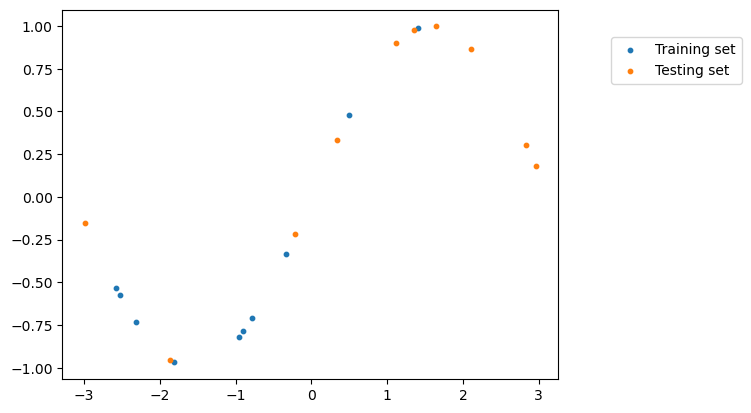

PyObject <matplotlib.legend.Legend object at 0x7fa505490dc0>

In [3]:
# rozdeleni na trenovaci data (fituji se) a testovaci data

ind = collect(1:n)

ind_train = sample(1:n, Int(n/2), replace = false)
ind_test = setdiff(ind, ind_train)
x_train = x[ind_train]
x_test = x[ind_test]
y_train = y[ind_train]
y_test = y[ind_test]


fig = figure()
scatter(x_train,y_train, s=10, label = "Training set")
scatter(x_test,y_test, s=10, label = "Testing set")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [45]:
function P( w, x, d)
    res = zeros(size(x))

    for i=1:size(x)[1]
        for j=1:d
            res[i] = res[i] + w[j]*x[i]^(j-1)
        end
    end
    return res
end


function grad(x,y,w,d)
    g = zeros(d)
    
    dif = (P(w,x,d) .- y)
    
    for j=1:d
        for i =1:size(x)[1]
            g[j] = g[j] + dif[i]*x[i]^(j-1)
        end
    end
    
    return g, sqrt(sum(dif.*dif))
end

function grad_descend(x, y, w0, d, step)
    i = 0
    g_norm = 1.0    
    while (i<5.0e7 && g_norm > 0.05)
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*g
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, 5.0e6)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end


function grad_descend_regul(x, y, w0, d, step, l)
    i = 0
    g_norm = 1.0    
    while (i<8.0e7 && g_norm > 0.05)
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*(g .+ l.*w0)    # zahrnuta derivace regul. clenu
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, 5.0e6)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end


grad_descend_regul (generic function with 1 method)

iter = 5000000
  w = [-0.019959826469234644, 0.3723353793031622]
  loss = 1.1614013215585384
g norm = 0.06431802448590351



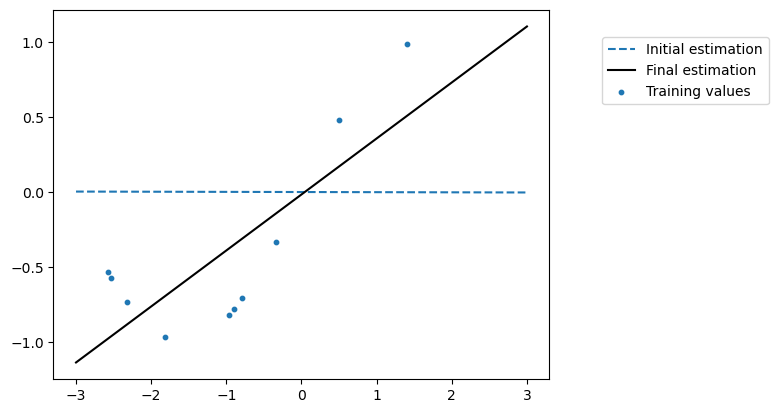

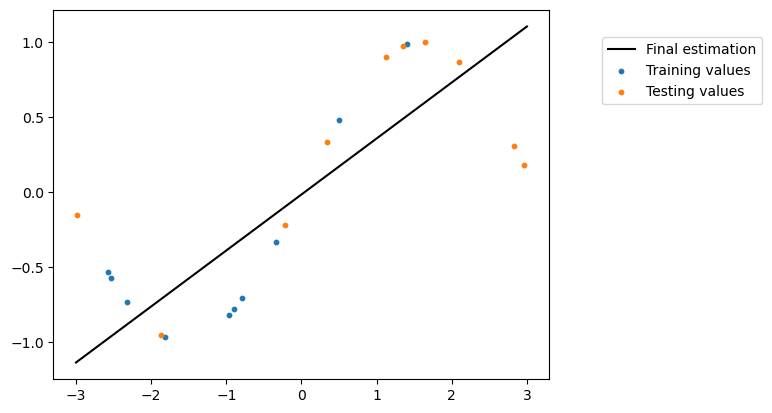

w final = [-0.017391715890799832, 0.3735728309418192]


PyObject <matplotlib.legend.Legend object at 0x7fa4ca0eba60>

In [28]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 2
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x_train, y_train, w_init, d, 1.0e-7)
println("w final = ", w_final)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


iter = 5000000
  w = [-0.1825030706776068, 0.7073346131886817, 0.12332314533801271, -0.03548538251403601]
  loss = 0.3556269130710919
g norm = 0.4569345868684945

iter = 10000000
  w = [-0.12664984514482397, 0.8242606918285446, 0.08457234498611403, -0.06737511354842256]
  loss = 0.20294310330367843
g norm = 0.19012133794163902

iter = 15000000
  w = [-0.0811557780046542, 0.8678247568158473, 0.053427723171870445, -0.08422994320945308]
  loss = 0.14041229179139358
g norm = 0.1075959842918655

iter = 20000000
  w = [-0.05405266763972595, 0.8907996339776147, 0.03489862913467198, -0.09374507522363522]
  loss = 0.11293253290621104
g norm = 0.06144549722254935



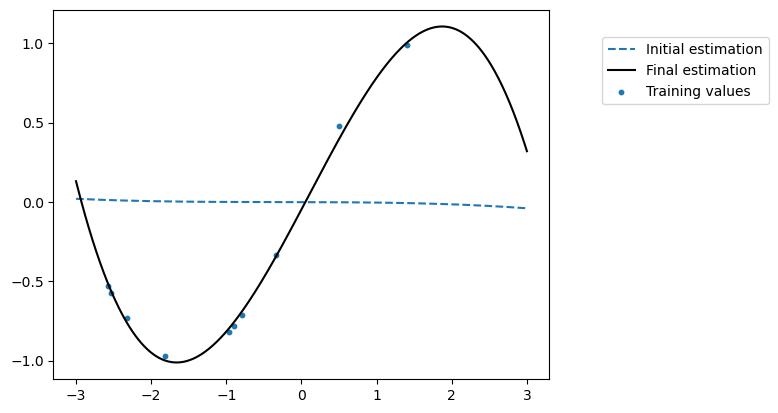

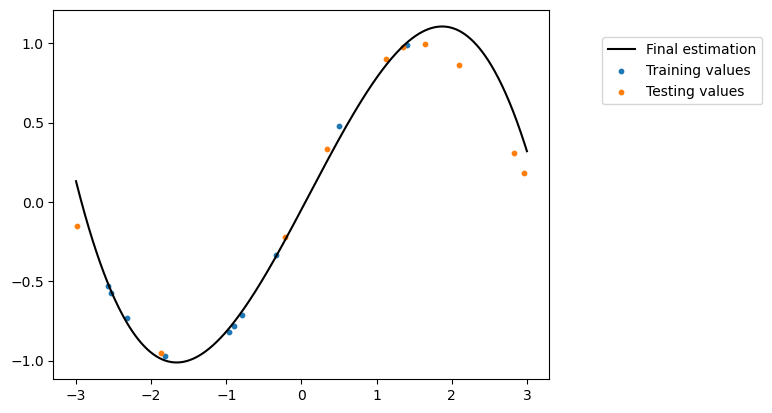

w final = [-0.04729157137664114, 0.8964376803576221, 0.03027718577817388, -0.09610223516935125]


PyObject <matplotlib.legend.Legend object at 0x7fa4c9cf2eb0>

In [32]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 4
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x_train, y_train, w_init, d, 1.0e-7)
println("w final = ", w_final)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

iter = 5000000
  w = [-0.1553961869199241, 0.414075331411812, -0.10983127978627842, 0.12384372210807773, 0.10792276836048839, 0.010323717660674397]
  loss = 0.5143323324645507
g norm = 0.4159515296096009

iter = 10000000
  w = [-0.1170293536513916, 0.5594050047103426, -0.12744028802014626, 0.04028104699384853, 0.10143444890502275, 0.016597072268339893]
  loss = 0.37797006755528556
g norm = 0.2930533243972257

iter = 15000000
  w = [-0.07622955452272948, 0.6638147327755535, -0.1360574116481365, -0.015897051381944173, 0.09204161422721185, 0.018996791723158327]
  loss = 0.280693435650371
g norm = 0.21536968071941187

iter = 20000000
  w = [-0.04528257990813746, 0.7407190611031669, -0.14022764371430085, -0.056490965866647765, 0.08393897206240197, 0.020315365596911134]
  loss = 0.21000037880984515
g norm = 0.15862186414186366

iter = 25000000
  w = [-0.022870729170611385, 0.7976890113182706, -0.14144735979235454, -0.08615487222328772, 0.0772005326161521, 0.02104785522157645]
  loss = 0.1589

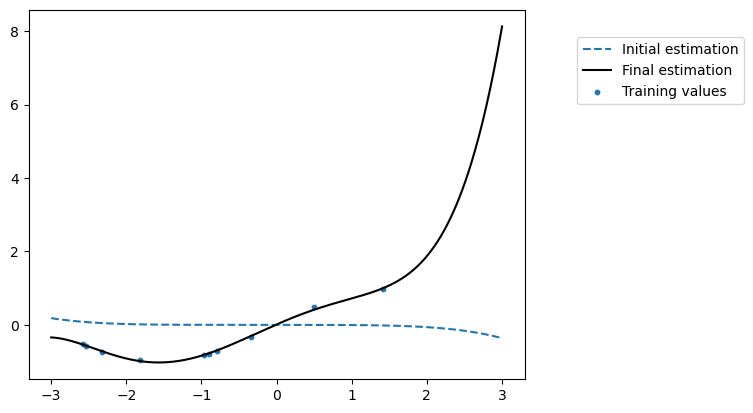

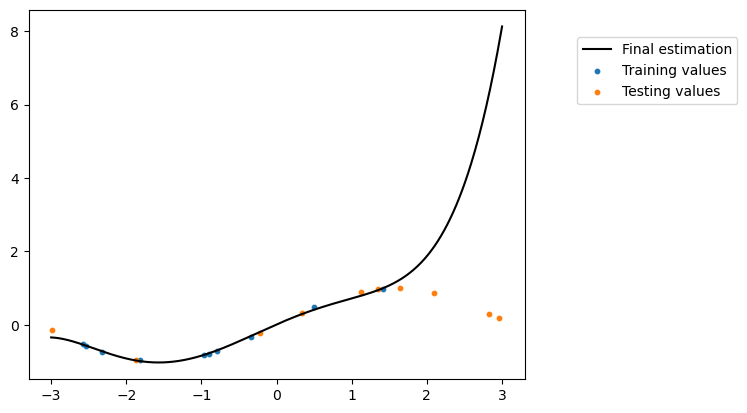

w final = [0.011576175846526805, 0.8928395239336202, -0.13547542721099082, -0.13411602050953872, 0.06296492068509178, 0.021311289385393447]


PyObject <matplotlib.legend.Legend object at 0x7fa4c9cb0250>

In [33]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 6
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x_train, y_train, w_init, d, 1.0e-7)
println("w final = ", w_final)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)
